In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
url1 = "https://datasets.imdbws.com/name.basics.tsv.gz"
url2 = "https://datasets.imdbws.com/title.basics.tsv.gz"
url3 = "https://datasets.imdbws.com/title.ratings.tsv.gz"
url4 = "https://datasets.imdbws.com/title.crew.tsv.gz"

In [3]:
namebasics = pd.read_table(url1)
tittlebasics = pd.read_table(url2)
tittleratings = pd.read_table(url3)
tittlecrew = pd.read_table(url4)

<ipython-input-3-c6c42f012579>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tittlebasics = pd.read_table(url2)


In [4]:
tittlebasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232315 entries, 0 to 10232314
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 702.6+ MB


In [5]:
#ver os diferentes "formatos" dentro do dataset
tittlebasics.groupby("titleType").size()

titleType
movie            659698
short            956297
tvEpisode       7800305
tvMiniSeries      50776
tvMovie          143205
tvPilot               1
tvSeries         250546
tvShort           10036
tvSpecial         43758
video            281512
videoGame         36181
dtype: int64

In [6]:
#selecionar apenas os "movie" e "tvMovie"
tittlebasics_movies = tittlebasics.loc[(tittlebasics['titleType'] == "movie") | (tittlebasics['titleType'] == "tvMovie")]
tittlebasics_movies.groupby("titleType").size()

titleType
movie      659698
tvMovie    143205
dtype: int64

In [7]:
#juntar o dataset com informação sobre o filme e o dataset com o rating e número de votos
Movies_rating=pd.merge(tittlebasics_movies,tittleratings, on='tconst')

In [8]:
#selecionar apenas os filmes com mais de 1000 votos
Movies_rating_filtered=Movies_rating[Movies_rating['numVotes']>=1000]


In [9]:
Movies_rating_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43688 entries, 62 to 349663
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          43688 non-null  object 
 1   titleType       43688 non-null  object 
 2   primaryTitle    43688 non-null  object 
 3   originalTitle   43688 non-null  object 
 4   isAdult         43688 non-null  object 
 5   startYear       43688 non-null  object 
 6   endYear         43688 non-null  object 
 7   runtimeMinutes  43688 non-null  object 
 8   genres          43688 non-null  object 
 9   averageRating   43688 non-null  float64
 10  numVotes        43688 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


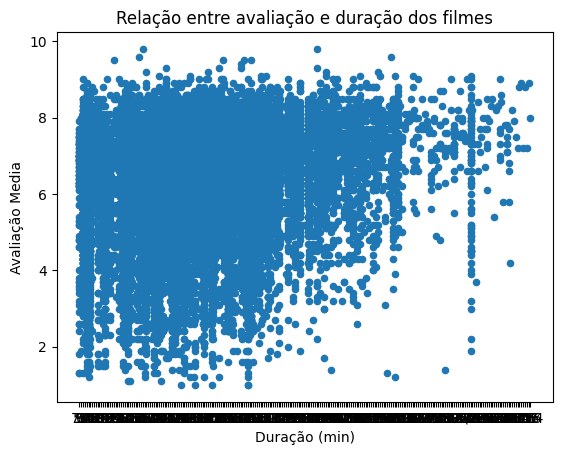

In [10]:
Movies_rating_filtered.plot(kind='scatter', x='runtimeMinutes', y='averageRating')
plt.title('Relação entre avaliação e duração dos filmes')
plt.xlabel('Duração (min)')
plt.ylabel('Avaliação Media')
plt.show()

<ipython-input-11-f8255bfc9f99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movies_rating_filtered['grupo'] = pd.cut(Movies_rating_filtered['averageRating'], bins=range(0, 11))


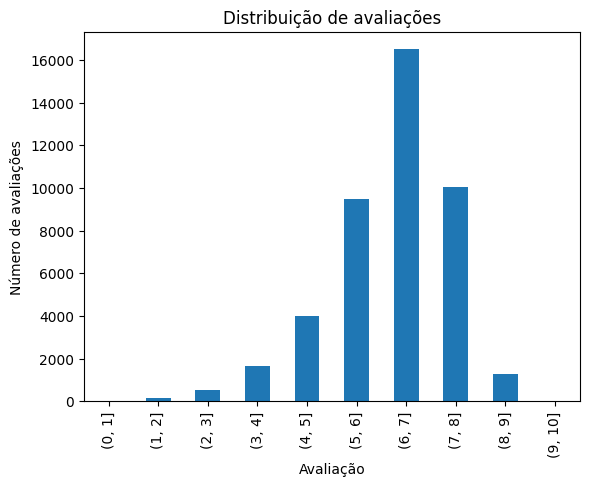

,grupo,numero_de_avaliacoes
0,"(0, 1]",5
1,"(1, 2]",140
2,"(2, 3]",546
3,"(3, 4]",1658
4,"(4, 5]",3989
5,"(5, 6]",9486
6,"(6, 7]",16497
7,"(7, 8]",10042
8,"(8, 9]",1298
9,"(9, 10]",27


In [11]:
Movies_rating_filtered['grupo'] = pd.cut(Movies_rating_filtered['averageRating'], bins=range(0, 11))
counts = Movies_rating_filtered['grupo'].value_counts()
counts = counts.sort_index()
counts.plot(kind='bar')
plt.title('Distribuição de avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Número de avaliações')
plt.show()

results = pd.DataFrame({'grupo': counts.index, 'numero_de_avaliacoes': counts.values})
results = results.sort_values(by=['grupo'])
results

TypeError: ignored

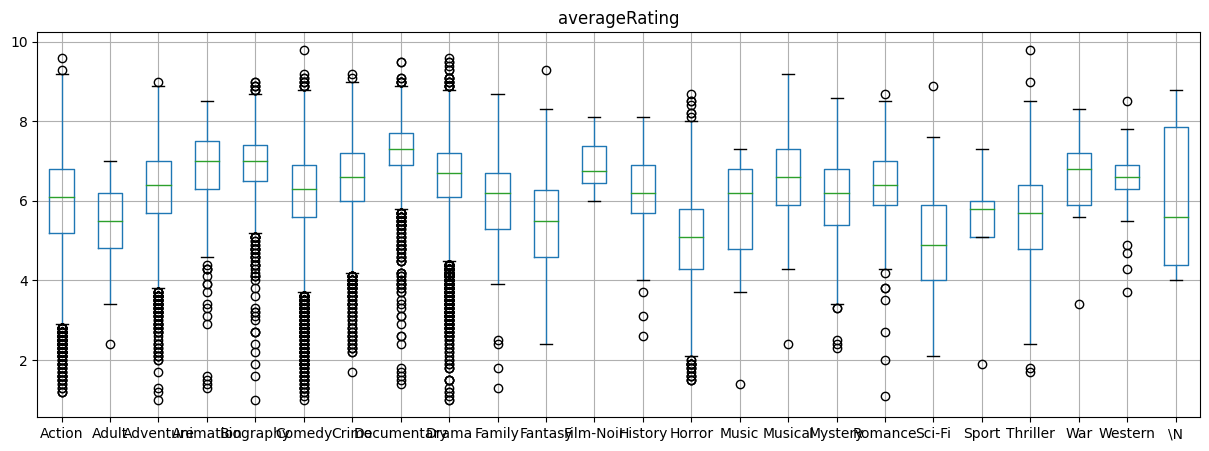

In [12]:
#criar gráfico de bigodes por genero
Movie_genre = Movies_rating_filtered['genres'].str.split(',', expand=True)
Movie_genre_boxplot = pd.concat([Movie_genre, Movies_rating_filtered['averageRating']], axis=1)
# transformar a coluna de avaliação em numérica
Movie_genre_boxplot['averageRating'] = pd.to_numeric(Movie_genre_boxplot['averageRating'])
# criar boxplots para cada gênero
boxplots = []
for col in Movie_genre.columns:
    boxplot = Movie_genre_boxplot.boxplot(column='averageRating', by=col, ax=plt.subplots(figsize=(15,5))[1])
    boxplot.set_title(col)
    boxplot.set_xlabel('Gênero')
    boxplot.set_ylabel('Avaliação')
    boxplots.append(boxplot)
plt.show()

In [13]:
generos_unicos = pd.unique(Movie_genre_boxplot[[0,1,2]].values.ravel())
num_generos = len(generos_unicos)
print("Há", num_generos, "gêneros diferentes de filmes:", generos_unicos)


print("Número de filmes em cada gênero:")
filmes_por_genero = pd.concat([Movie_genre_boxplot[0], Movie_genre_boxplot[1], Movie_genre_boxplot[2]]).value_counts()
filmes_por_genero

Há 27 gêneros diferentes de filmes: ['Adventure' 'Drama' 'Fantasy' 'Crime' None 'Mystery' 'Horror' 'History'
 'Action' 'Romance' 'Comedy' 'War' 'Biography' 'Sci-Fi' 'Western' 'Family'
 'Thriller' 'Sport' 'Documentary' 'Animation' 'Musical' 'Music'
 'Film-Noir' 'News' 'Adult' '\\N' 'Reality-TV']
Número de filmes em cada gênero:


Drama          24072
Comedy         14764
Action          8005
Romance         7732
Crime           7062
Thriller        6446
Horror          5623
Adventure       4948
Mystery         3614
Fantasy         2463
Biography       2372
Sci-Fi          2267
Documentary     2224
Family          2158
History         1667
Animation       1449
Music           1320
War             1129
Sport            832
Musical          750
Western          633
Film-Noir        405
News              31
Adult             19
\N                 7
Reality-TV         5
dtype: int64

#só filme comédia

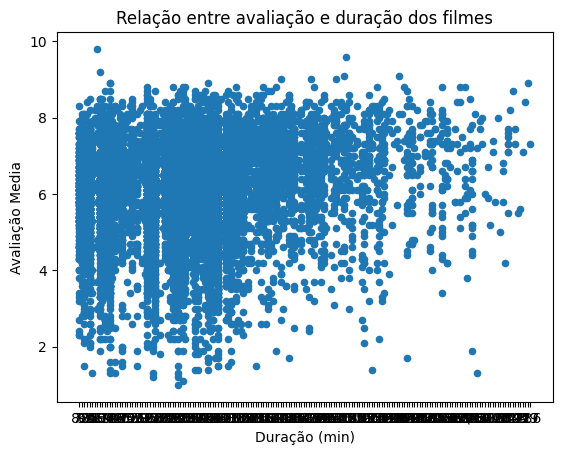

<ipython-input-14-0d0ab4f35038>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movies_rating_filtered_Comedy['grupo'] = pd.cut(Movies_rating_filtered_Comedy['averageRating'], bins=range(0, 11))


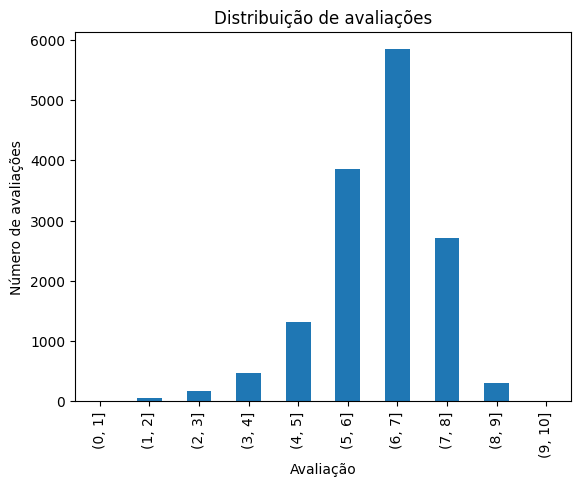

,grupo,numero_de_avaliacoes
0,"(0, 1]",1
1,"(1, 2]",60
2,"(2, 3]",182
3,"(3, 4]",477
4,"(4, 5]",1321
5,"(5, 6]",3859
6,"(6, 7]",5840
7,"(7, 8]",2712
8,"(8, 9]",307
9,"(9, 10]",5


In [14]:
Movies_rating_filtered_Comedy = Movies_rating_filtered[Movies_rating_filtered['genres'].str.contains('comedy', case=False, regex=True)]
Movies_rating_filtered_Comedy.plot(kind='scatter', x='runtimeMinutes', y='averageRating')
plt.title('Relação entre avaliação e duração dos filmes')
plt.xlabel('Duração (min)')
plt.ylabel('Avaliação Media')
plt.show()

Movies_rating_filtered_Comedy['grupo'] = pd.cut(Movies_rating_filtered_Comedy['averageRating'], bins=range(0, 11))
counts = Movies_rating_filtered_Comedy['grupo'].value_counts()
counts = counts.sort_index()
counts.plot(kind='bar')
plt.title('Distribuição de avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Número de avaliações')
plt.show()

results = pd.DataFrame({'grupo': counts.index, 'numero_de_avaliacoes': counts.values})
results = results.sort_values(by=['grupo'])
results

#só ação

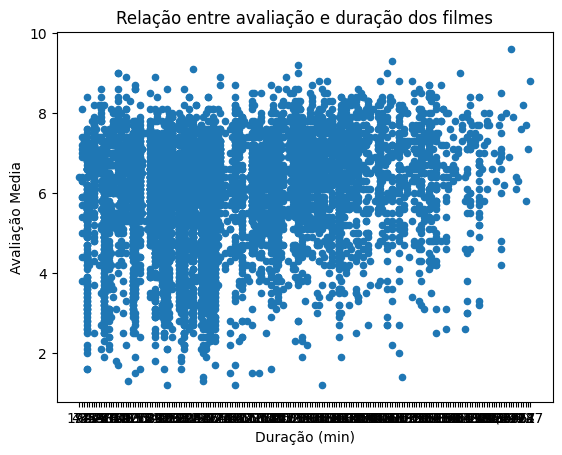

<ipython-input-15-5f561e98ea39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movies_rating_filtered_Action['grupo'] = pd.cut(Movies_rating_filtered_Action['averageRating'], bins=range(0, 11))


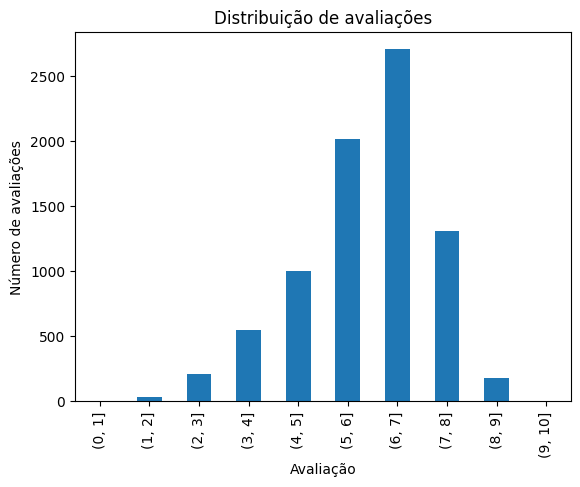

,grupo,numero_de_avaliacoes
0,"(0, 1]",0
1,"(1, 2]",32
2,"(2, 3]",209
3,"(3, 4]",548
4,"(4, 5]",1000
5,"(5, 6]",2016
6,"(6, 7]",2704
7,"(7, 8]",1308
8,"(8, 9]",184
9,"(9, 10]",4


In [15]:
Movies_rating_filtered_Action = Movies_rating_filtered[Movies_rating_filtered['genres'].str.contains('Action', case=False, regex=True)]
Movies_rating_filtered_Action.plot(kind='scatter', x='runtimeMinutes', y='averageRating')
plt.title('Relação entre avaliação e duração dos filmes')
plt.xlabel('Duração (min)')
plt.ylabel('Avaliação Media')
plt.show()

Movies_rating_filtered_Action['grupo'] = pd.cut(Movies_rating_filtered_Action['averageRating'], bins=range(0, 11))
counts = Movies_rating_filtered_Action['grupo'].value_counts()
counts = counts.sort_index()
counts.plot(kind='bar')
plt.title('Distribuição de avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Número de avaliações')
plt.show()

results = pd.DataFrame({'grupo': counts.index, 'numero_de_avaliacoes': counts.values})
results = results.sort_values(by=['grupo'])
results

In [16]:
all_genres = set(Movie_genre_boxplot[[0, 1, 2]].values.flatten())
genre_ratings = {}
for genre in all_genres:
    mask = Movie_genre_boxplot.apply(lambda row: genre in row.values, axis=1)
    genre_movies = Movie_genre_boxplot.loc[mask]
    avg_rating = genre_movies['averageRating'].mean()
    genre_ratings[genre] = avg_rating

for genre, rating in genre_ratings.items():
    print(f"A média das avaliações dos filmes com gênero '{genre}' é {rating:.2f}.")

A média das avaliações dos filmes com gênero 'Action' é 5.91.
A média das avaliações dos filmes com gênero 'Drama' é 6.53.
A média das avaliações dos filmes com gênero 'Crime' é 6.36.
A média das avaliações dos filmes com gênero 'Film-Noir' é 6.94.
A média das avaliações dos filmes com gênero 'Fantasy' é 5.93.
A média das avaliações dos filmes com gênero 'News' é 7.57.
A média das avaliações dos filmes com gênero 'Comedy' é 6.16.
A média das avaliações dos filmes com gênero '\N' é 6.13.
A média das avaliações dos filmes com gênero 'Sci-Fi' é 5.42.
A média das avaliações dos filmes com gênero 'Musical' é 6.54.
A média das avaliações dos filmes com gênero 'Family' é 6.20.
A média das avaliações dos filmes com gênero 'Romance' é 6.40.
A média das avaliações dos filmes com gênero 'Sport' é 6.54.
A média das avaliações dos filmes com gênero 'Adult' é 5.29.
A média das avaliações dos filmes com gênero 'None' é 6.27.
A média das avaliações dos filmes com gênero 'Mystery' é 6.07.
A média das a

In [17]:
Movies_rating_filtered.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,grupo
62,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,3259,"(6, 7]"
98,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",6.9,2424,"(6, 7]"
107,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1364,"(6, 7]"
110,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",6.9,1644,"(6, 7]"
114,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",6.9,1302,"(6, 7]"


In [18]:
tittlecrew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
10232310,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10232311,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
10232312,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10232313,tt9916856,nm10538645,nm6951431


In [19]:
#juntar o dataset com os filmes filtrados e a dataset dos participantes
Movies_crew= pd.merge(tittlecrew,Movies_rating_filtered, on='tconst')

In [20]:
Movies_crew.head()

,tconst,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,grupo
0,tt0002130,"nm0078205,nm0655824,nm0209738",nm0019604,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,3259,"(6, 7]"
1,tt0002844,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",6.9,2424,"(6, 7]"
2,tt0003014,nm0803705,"nm0472236,nm0803705",movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1364,"(6, 7]"
3,tt0003037,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",6.9,1644,"(6, 7]"
4,tt0003165,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",6.9,1302,"(6, 7]"


In [21]:
df_media_writer =Movies_crew.groupby('writers')['averageRating'].mean().reset_index()
df_media_writer = df_media_writer.rename(columns={'averageRating': 'avaliação_writer'})
display(df_media_writer)
df_media_directors =Movies_crew.groupby('directors')['averageRating'].mean().reset_index()
df_media_directors = df_media_directors.rename(columns={'averageRating': 'avaliação_directors'})
display(df_media_directors)

,writers,avaliação_writer
0,\N,7.102874
1,nm0000005,7.512500
2,"nm0000005,nm0279027",6.400000
3,"nm0000005,nm0340471",7.500000
4,"nm0000005,nm0410694",7.300000
...,...,...
35968,"nm9984203,nm3226379",6.700000
35969,"nm9985761,nm0610219,nm0807023",6.700000
35970,"nm9985837,nm1126346",2.900000
35971,nm9991049,6.200000


,directors,avaliação_directors
0,\N,7.166667
1,nm0000005,7.309302
2,nm0000008,7.100000
3,"nm0000009,nm0169065",5.400000
4,nm0000018,6.500000
...,...,...
18789,nm9955426,7.450000
18790,nm9957570,6.300000
18791,"nm9958352,nm5372764,nm3986275",3.200000
18792,nm9977852,7.400000


In [22]:
Movie = pd.merge(Movies_crew, df_media_writer, on='writers', how='left')
Movie = pd.merge(Movie, df_media_directors, on='directors', how='left')
Movie

,tconst,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,grupo,avaliação_writer,avaliação_directors
0,tt0002130,"nm0078205,nm0655824,nm0209738",nm0019604,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,3259,"(6, 7]",7.000000,7.000000
1,tt0002844,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",6.9,2424,"(6, 7]",6.840000,6.957143
2,tt0003014,nm0803705,"nm0472236,nm0803705",movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1364,"(6, 7]",7.000000,7.557143
3,tt0003037,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",6.9,1644,"(6, 7]",6.840000,6.957143
4,tt0003165,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",6.9,1302,"(6, 7]",6.840000,6.957143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43683,tt9907782,nm1193346,nm1193346,movie,The Cursed,Eight for Silver,0,2021,\N,111,"Fantasy,Horror,Mystery",6.2,14548,"(6, 7]",6.233333,6.700000
43684,tt9908390,nm1415268,"nm1597648,nm1597688",movie,Le lion,Le lion,0,2020,\N,95,Comedy,5.5,1335,"(5, 6]",4.750000,5.500000
43685,tt9911196,nm0631590,"nm2063122,nm0277932,nm0495599,nm3547655",movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,\N,103,"Comedy,Drama",7.5,3163,"(7, 8]",7.500000,5.240000
43686,tt9916270,nm1480867,"nm1480867,nm10538402",movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1445,"(5, 6]",5.800000,5.800000


In [23]:
directors_df = Movie['directors'].str.split(',').explode().str.strip()
# Usar a função 'value_counts' para contar o número de filmes para cada diretor
director_counts = directors_df.value_counts().reset_index()
director_counts.columns = ['DirectorID', 'Number_of_Films']
print(director_counts)

      DirectorID  Number_of_Films
0      nm0002031               59
1      nm0000095               52
2      nm0000033               52
3      nm0000406               49
4      nm0909825               48
...          ...              ...
19626  nm0408120                1
19627  nm0538529                1
19628  nm1464150                1
19629  nm1349821                1
19630  nm1893148                1

[19631 rows x 2 columns]


In [24]:
writers_df = Movie['writers'].str.split(',').explode().str.strip()
# Usar a função 'value_counts' para contar o número de filmes para cada escritor
writers_counts = writers_df.value_counts().reset_index()
writers_counts.columns = ['writers', 'Number_of_Films']
print(writers_counts)

         writers  Number_of_Films
0             \N             1044
1      nm0372942               86
2      nm0000636               86
3      nm0000175               66
4      nm0000095               55
...          ...              ...
44756  nm1371022                1
44757  nm1650374                1
44758  nm1360804                1
44759  nm0790515                1
44760  nm3471432                1

[44761 rows x 2 columns]


In [25]:
escritores_df = df_media_writer['writers'].str.split(',').explode().str.strip()
df_escritores = writers_counts.merge(escritores_df.value_counts().reset_index(), left_on='writers', right_on='index', how='left')
writers_counts.columns = ['writers', 'Numero_de_Filmes']
writers_counts = writers_counts.merge(df_media_writer, on='writers', how='left')
print(writers_counts)

         writers  Numero_de_Filmes  avaliação_writer
0             \N              1044          7.102874
1      nm0372942                86          6.800000
2      nm0000636                86          8.025000
3      nm0000175                66          5.900000
4      nm0000095                55          6.902273
...          ...               ...               ...
44756  nm1371022                 1               NaN
44757  nm1650374                 1               NaN
44758  nm1360804                 1               NaN
44759  nm0790515                 1               NaN
44760  nm3471432                 1               NaN

[44761 rows x 3 columns]


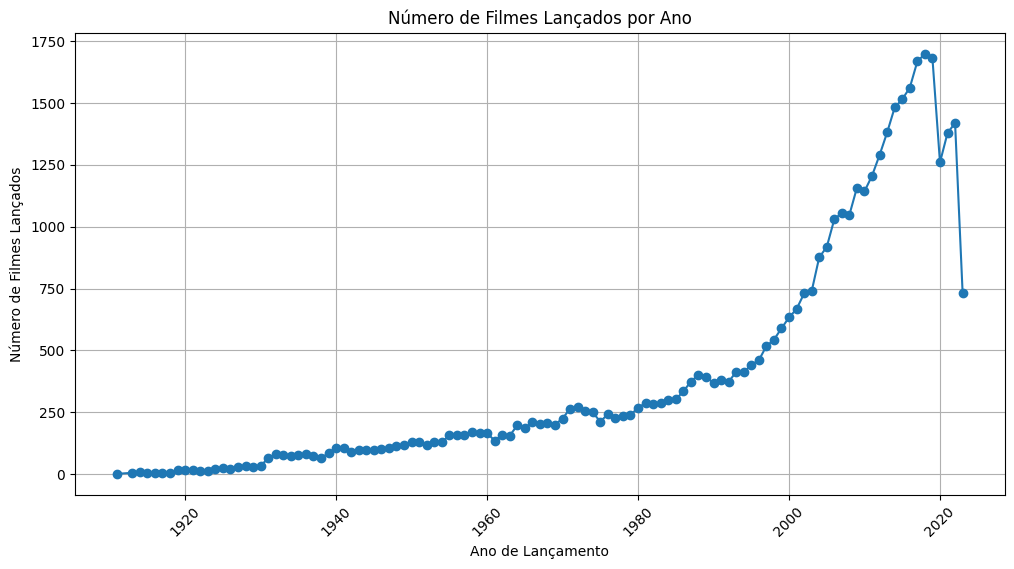

In [26]:
Movies_crew['startYear'] = pd.to_datetime(Movies_crew['startYear']).dt.year

# Contar quantos filmes foram lançados em cada ano
filmes_por_ano = Movies_crew['startYear'].value_counts().sort_index()

# Criar um gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(filmes_por_ano.index, filmes_por_ano.values, marker='o', linestyle='-')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes Lançados')
plt.title('Número de Filmes Lançados por Ano')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [27]:
estatisticas=Movie.describe()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(estatisticas)

       averageRating      numVotes  avaliação_writer  avaliação_directors
count   43688.000000  4.368800e+04      43688.000000         43688.000000
mean        6.249924  2.413357e+04          6.249924             6.249924
std         1.181965  9.052214e+04          1.135638             1.030067
min         1.000000  1.000000e+03          1.000000             1.000000
25%         5.600000  1.633000e+03          5.666667             5.740000
50%         6.400000  3.177500e+03          6.400000             6.433333
75%         7.100000  9.947750e+03          7.100000             6.914286
max         9.800000  2.807321e+06          9.800000             9.800000


In [28]:
pip install matplotlib wordcloud pandas

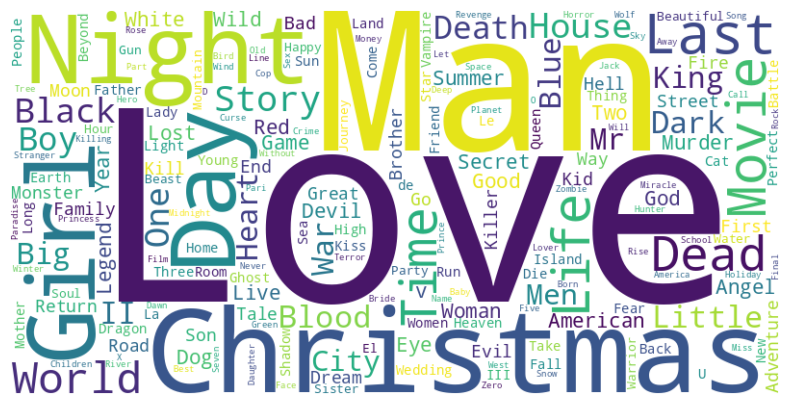

In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combinar todos os títulos numa única string
all_titles = ' '.join(Movie['primaryTitle'])
# Criar uma WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

#WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


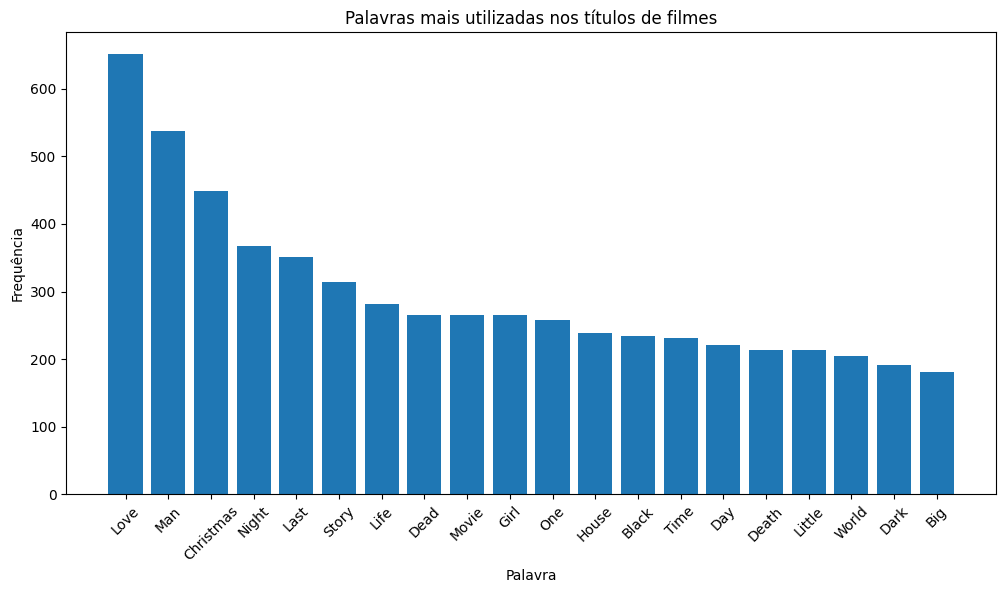

In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Importar as stopwords em ingles
stop_words = set(stopwords.words('english'))

# Dividir a string em palavras
words = all_titles.split()

filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in ["&", "2","-"]]

# Contar a frequência de cada palavra filtrada
word_freq = Counter(filtered_words)

# Criar um DataFrame com as palavras e suas contagens
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Palavra', 'Contagem'])

# Ordenar o DataFrame pela contagem em ordem decrescente
word_freq_df = word_freq_df.sort_values(by='Contagem', ascending=False)

# gráfico de barras das palavras mais utilizadas
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Palavra'][:20], word_freq_df['Contagem'][:20])
plt.xticks(rotation=45)
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Palavras mais utilizadas nos títulos de filmes')
plt.show()

word_freq_dfd = word_freq_df.sort_values(by='Contagem', ascending=True)


<ipython-input-38-26ac36ed58c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['runtimeMinutes'] = Movie['runtimeMinutes'].round().astype(int)


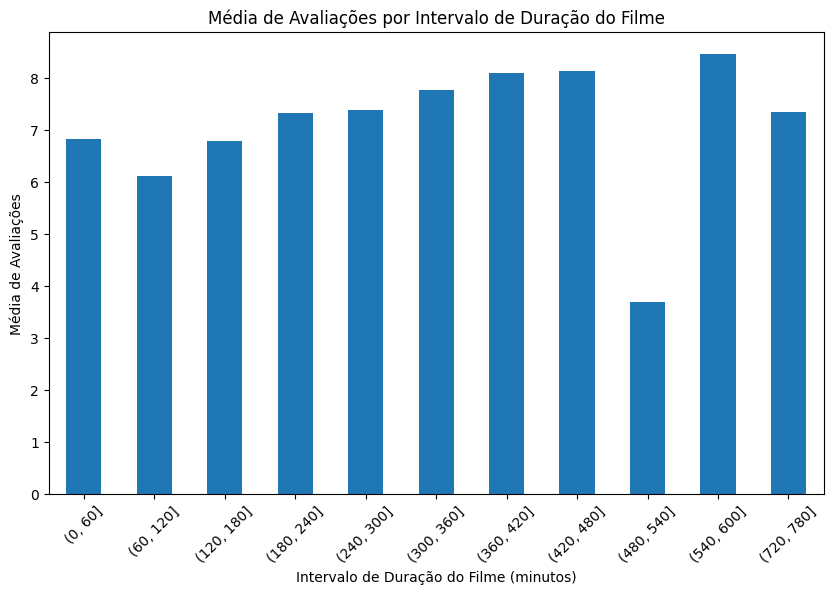

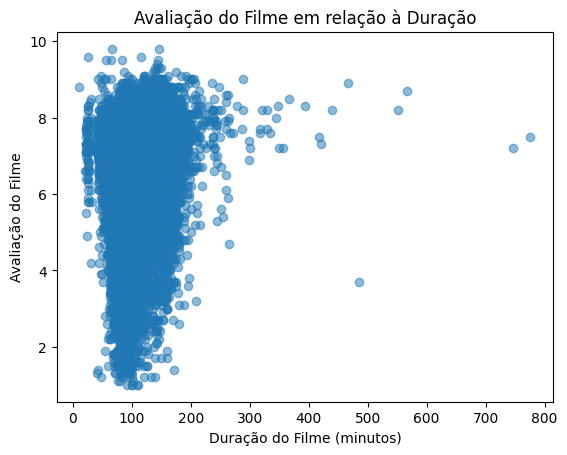

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Movie['runtimeMinutes'] = pd.to_numeric(Movie['runtimeMinutes'], errors='coerce')
Movie = Movie.dropna(subset=['runtimeMinutes'])
Movie['runtimeMinutes'] = Movie['runtimeMinutes'].round().astype(int)

# Criar os intervalos de 60 em 60 minutos usando a função pd.cut
intervalos = pd.cut(Movie['runtimeMinutes'], bins=range(0, Movie['runtimeMinutes'].max() + 60, 60))

# Calcular a média das avaliações para cada intervalo
media_avaliacoes_por_intervalo = Movie.groupby(intervalos)['averageRating'].mean()

media_avaliacoes_por_intervalo = media_avaliacoes_por_intervalo.dropna()
media_avaliacoes_por_intervalo.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Intervalo de Duração do Filme (minutos)')
plt.ylabel('Média de Avaliações')
plt.title('Média de Avaliações por Intervalo de Duração do Filme')
plt.xticks(rotation=45)
plt.show()

plt.scatter(Movie['runtimeMinutes'], Movie['averageRating'], alpha=0.5)
plt.xlabel('Duração do Filme (minutos)')
plt.ylabel('Avaliação do Filme')
plt.title('Avaliação do Filme em relação à Duração')
plt.show()


In [39]:
import pandas as pd
import numpy as np

# Definir uma função para calcular a média e a contagem de filmes em cada intervalo
def custom_agg(group):
    return {
        'Rating': round(group['averageRating'].mean(), 2),  # Arredonda para 2 casas decimais
        'Count': group['averageRating'].count()
    }
resultado = Movie.groupby(intervalos).apply(custom_agg)
print(resultado)

runtimeMinutes
(0, 60]         {'Rating': 6.83, 'Count': 431}
(60, 120]     {'Rating': 6.12, 'Count': 35549}
(120, 180]     {'Rating': 6.78, 'Count': 7307}
(180, 240]      {'Rating': 7.33, 'Count': 274}
(240, 300]       {'Rating': 7.37, 'Count': 35}
(300, 360]       {'Rating': 7.77, 'Count': 10}
(360, 420]         {'Rating': 8.1, 'Count': 3}
(420, 480]        {'Rating': 8.13, 'Count': 3}
(480, 540]         {'Rating': 3.7, 'Count': 1}
(540, 600]        {'Rating': 8.45, 'Count': 2}
(600, 660]         {'Rating': nan, 'Count': 0}
(660, 720]         {'Rating': nan, 'Count': 0}
(720, 780]        {'Rating': 7.35, 'Count': 2}
dtype: object


In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Descarregar o léxico Vader
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Aplicar a análise de sentimento nos títulos dos filmes
Movie['sentimento'] = Movie['primaryTitle'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classificar os sentimentos
Movie['classificacao_sentimento'] = Movie['sentimento'].apply(lambda x: 'Positivo' if x >= 0 else 'Negativo')
Movie['Title_Char'] = Movie['primaryTitle'].apply(len)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-40-cc3964923bb4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['sentimento'] = Movie['primaryTitle'].apply(lambda x: sia.polarity_scores(x)['compound'])
<ipython-input-40-cc3964923bb4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['classificacao_sentimento'] = Movie['sentimento'].apply(lambda x: 'Positivo' if x >= 0 else 'Negativo')
<ipython-input-40-cc3964923bb4>:14: SettingWithCopyWarning: 
A value is tr

In [41]:
#tirar as colunas endYear e primaryttitle e grupo
Movie.drop(columns=['endYear', 'originalTitle','grupo'], inplace=True)

<ipython-input-41-005c0e8f4689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie.drop(columns=['endYear', 'originalTitle','grupo'], inplace=True)


In [42]:
estatisticas=Movie.describe()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(estatisticas)

       runtimeMinutes  averageRating      numVotes  avaliação_writer  \
count    43617.000000   43617.000000  4.361700e+04      43617.000000   
mean       104.298920       6.249724  2.416860e+04          6.249437   
std         23.599471       1.181076  9.059131e+04          1.135072   
min         11.000000       1.000000  1.000000e+03          1.000000   
25%         90.000000       5.600000  1.635000e+03          5.666667   
50%        100.000000       6.400000  3.185000e+03          6.400000   
75%        114.000000       7.100000  9.974000e+03          7.100000   
max        776.000000       9.800000  2.807321e+06          9.800000   

       avaliação_directors    sentimento    Title_Char  
count         43617.000000  43617.000000  43617.000000  
mean              6.249537     -0.008565     15.660637  
std               1.029173      0.243271      8.634128  
min               1.000000     -0.937500      1.000000  
25%               5.740000      0.000000     10.000000  
50%      

In [43]:
Movie.head()

,tconst,directors,writers,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,avaliação_writer,avaliação_directors,sentimento,classificacao_sentimento,Title_Char
0,tt0002130,"nm0078205,nm0655824,nm0209738",nm0019604,movie,Dante's Inferno,0,1911,71,"Adventure,Drama,Fantasy",7.0,3259,7.00,7.000000,0.0000,Positivo,15
1,tt0002844,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: In the Shadow of the Guillotine,0,1913,54,"Crime,Drama",6.9,2424,6.84,6.957143,0.0000,Positivo,41
2,tt0003014,nm0803705,"nm0472236,nm0803705",movie,Ingeborg Holm,0,1913,96,Drama,7.0,1364,7.00,7.557143,0.0000,Positivo,13
3,tt0003037,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantomas: The Man in Black,0,1913,61,"Crime,Drama",6.9,1644,6.84,6.957143,0.0000,Positivo,26
4,tt0003165,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: The Dead Man Who Killed,0,1913,90,"Crime,Drama,Mystery",6.9,1302,6.84,6.957143,-0.8689,Negativo,33


In [44]:
import statsmodels.api as sm

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

Movie = Movie.replace('\\N', np.nan)

# Remover as linhas com Na
Movie = Movie.dropna(subset=['startYear', 'runtimeMinutes','sentimento','isAdult','avaliação_writer','avaliação_directors','genres','Title_Char'])

# Converter as colunas para float
Movie['startYear'] = Movie['startYear'].astype(float)
Movie['sentimento'] = Movie['sentimento'].astype(float)
Movie['isAdult'] = Movie['isAdult'].astype(float)
Movie['runtimeMinutes'] = Movie['runtimeMinutes'].astype(float)
Movie['avaliação_writer'] = Movie['avaliação_writer'].astype(float)
Movie['avaliação_directors'] = Movie['avaliação_directors'].astype(float)
Movie['Title_Char'] = Movie['Title_Char'].astype(float)

#converter a coluna Genres para categorias
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Aplicar a codificação de rótulo à coluna "coluna_categorica"
Movie['genres'] = label_encoder.fit_transform(Movie['genres'])

<ipython-input-45-40c94c9b94a4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['startYear'] = Movie['startYear'].astype(float)
<ipython-input-45-40c94c9b94a4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['sentimento'] = Movie['sentimento'].astype(float)
<ipython-input-45-40c94c9b94a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [46]:
Movie.head()

,tconst,directors,writers,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,avaliação_writer,avaliação_directors,sentimento,classificacao_sentimento,Title_Char
0,tt0002130,"nm0078205,nm0655824,nm0209738",nm0019604,movie,Dante's Inferno,0.0,1911.0,71.0,204,7.0,3259,7.00,7.000000,0.0000,Positivo,15.0
1,tt0002844,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: In the Shadow of the Guillotine,0.0,1913.0,54.0,494,6.9,2424,6.84,6.957143,0.0000,Positivo,41.0
2,tt0003014,nm0803705,"nm0472236,nm0803705",movie,Ingeborg Holm,0.0,1913.0,96.0,589,7.0,1364,7.00,7.557143,0.0000,Positivo,13.0
3,tt0003037,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantomas: The Man in Black,0.0,1913.0,61.0,494,6.9,1644,6.84,6.957143,0.0000,Positivo,26.0
4,tt0003165,nm0275421,"nm0019855,nm0275421,nm0816232",movie,Fantômas: The Dead Man Who Killed,0.0,1913.0,90.0,502,6.9,1302,6.84,6.957143,-0.8689,Negativo,33.0


In [47]:
estatisticas=Movie.describe()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(estatisticas)

            isAdult     startYear  runtimeMinutes        genres  \
count  43613.000000  43613.000000    43613.000000  43613.000000   
mean       0.000504   1999.470685      104.300025    423.714168   
std        0.022454     22.092809       23.595163    227.158768   
min        0.000000   1911.000000       20.000000      0.000000   
25%        0.000000   1989.000000       90.000000    301.000000   
50%        0.000000   2007.000000      100.000000    437.000000   
75%        0.000000   2016.000000      114.000000    590.000000   
max        1.000000   2023.000000      776.000000    804.000000   

       averageRating      numVotes  avaliação_writer  avaliação_directors  \
count   43613.000000  4.361300e+04      43613.000000         43613.000000   
mean        6.249637  2.417064e+04          6.249350             6.249488   
std         1.180978  9.059521e+04          1.134966             1.029109   
min         1.000000  1.000000e+03          1.000000             1.000000   
25%        

In [49]:
X = Movie[['isAdult', 'startYear', 'runtimeMinutes','sentimento','avaliação_writer','avaliação_directors','genres','Title_Char']]
y = Movie['averageRating']
X1 = sm.add_constant(X)

# Criar o modelo de regressão linear OLS
model = sm.OLS(y, X1)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 7.117e+04
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:02:46   Log-Likelihood:                -11500.
No. Observations:               43613   AIC:                         2.302e+04
Df Residuals:                   43604   BIC:                         2.310e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5128    

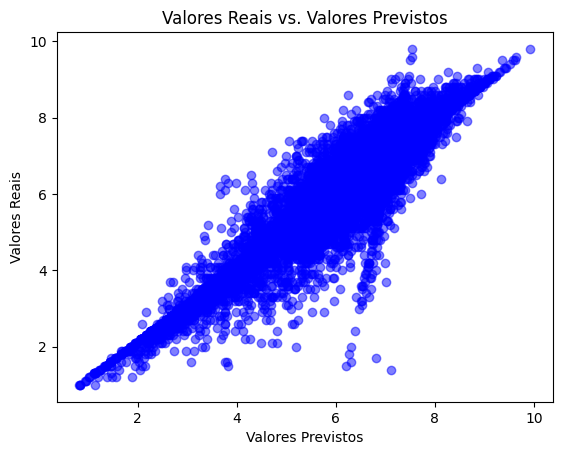

In [50]:
import matplotlib.pyplot as plt

plt.scatter(results.fittedvalues, y, c='b', alpha=0.5)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()

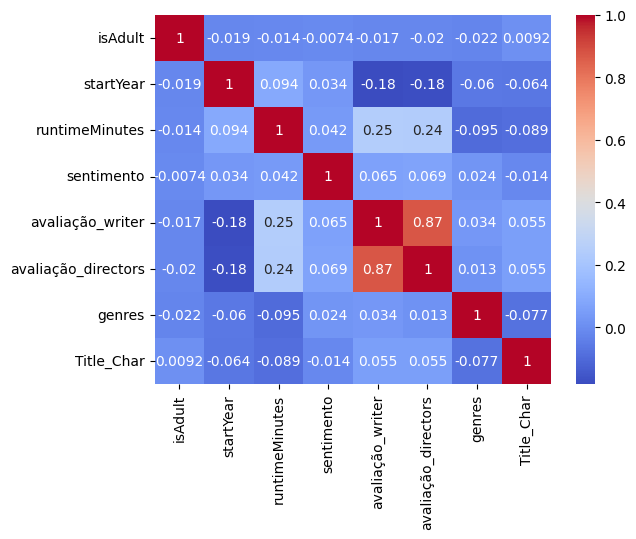

In [51]:
import seaborn as sns

#correlação das variáveis independentes(X)
correlation_matrix = X.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Ajustar um modelo de regressão linear usando statsmodels
model = sm.OLS(y, X1).fit()
# Calcular os VIFs (teste de multicolinearidade)
vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

              Variável         VIF
0              isAdult    1.001517
1            startYear   54.598421
2       runtimeMinutes   22.701503
3           sentimento    1.007036
4     avaliação_writer  131.073406
5  avaliação_directors  157.370675
6               genres    4.570042
7           Title_Char    4.381267


#DecisionTreeRegressor

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=3)

# Treinar o modelo
model.fit(X_train, y_train)

#previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.1572692896408689


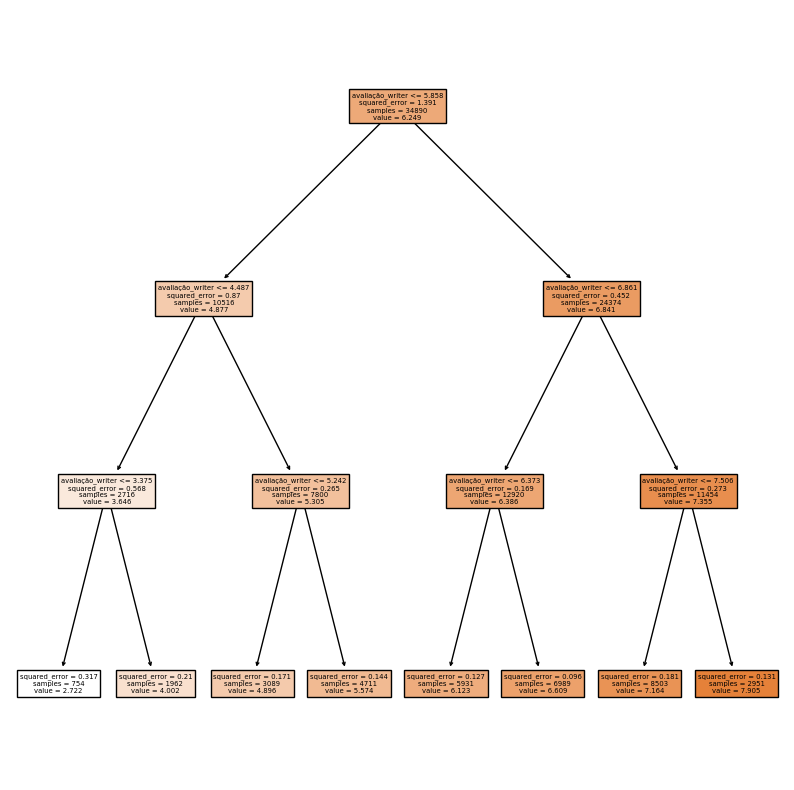

In [54]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

#usar análise das componentes principais (PCA) para padronizar as variáveis e evitar a correlação das mesmas

In [55]:
#import numpy as np
#import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
model_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
principal_components = pca.fit_transform(model_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

print("Proporção da variância explicada por cada componente:")
print(sum(pca.explained_variance_ratio_))

Proporção da variância explicada por cada componente:
0.7890857978117389


In [56]:
pca.components_

array([[-2.40125404e-02, -2.00858411e-01,  2.86542521e-01,
         8.84513348e-02,  6.58559043e-01,  6.57470925e-01,
         1.29381792e-02,  5.48963970e-02],
       [-9.06299592e-02,  6.05729609e-01,  5.86398961e-01,
         2.05117247e-01, -3.52453545e-02, -2.78924085e-02,
        -2.92862432e-01, -3.88783230e-01],
       [ 2.37785582e-01,  4.95751407e-02,  8.36733739e-02,
        -2.55616420e-01, -1.27728539e-02,  1.48733533e-03,
        -7.37489826e-01,  5.69739179e-01],
       [ 9.48644188e-01, -6.91901109e-02,  6.49597374e-02,
         6.08501656e-03,  6.21074008e-03,  7.76553684e-04,
         8.21442456e-02, -2.90246937e-01],
       [ 1.22922804e-01,  9.39658811e-02, -1.64247768e-01,
         9.05243503e-01, -2.60739323e-02, -2.06299208e-02,
        -9.18260095e-03,  3.58367836e-01]])

 #PC1 5 e 6  Autores (realizador & argumentista)
 #PC2 2 e 3 (ano e duração)
 #PC3 -7, 8  (genero? dimensaão titulo)
 #PC4 1 (adulto)
 #PC5 -4 (inverso sentimento)

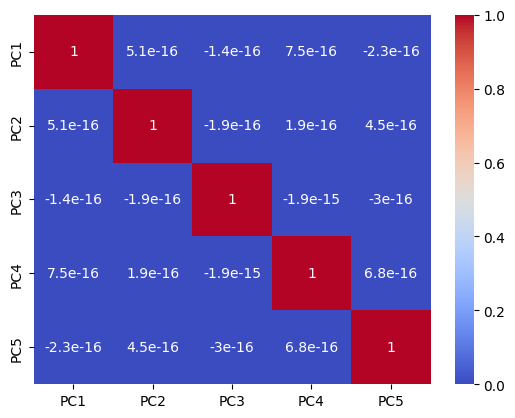

In [57]:
correlation_matrix = principal_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [58]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.301939,-2.974642,0.331402,0.111729,-0.166171
1,1.138910,-4.880802,1.051480,-0.711397,1.032642
2,1.952523,-2.719893,-0.956571,0.381170,-0.441437
3,1.128549,-4.031403,0.086502,-0.187882,0.361325
4,1.209772,-4.368804,1.538264,-0.362196,-2.783592


In [59]:
y1=y.reset_index()['averageRating']

In [60]:
# Criar o modelo de regressão linear OLS

principal_df_const=sm.add_constant(principal_df)
model = sm.OLS(y1, principal_df_const)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 5.251e+04
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:02:49   Log-Likelihood:                -26641.
No. Observations:               43613   AIC:                         5.329e+04
Df Residuals:                   43607   BIC:                         5.335e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2496      0.002   2928.087      0.0

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir os dados em conjunto de treino e conjunto de teste
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(principal_df_const, y, test_size=0.2, random_state=42)

# Lista de modelos
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "SVR": SVR(kernel='linear'),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=3),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, max_depth=3),
    "K-NN": KNeighborsRegressor(n_neighbors=5)
}

# Treinar e avaliar os modelos
for name, model in models.items():
    model.fit(Xpca_train, ypca_train)
    ypca_pred = model.predict(Xpca_test)
    mse = mean_squared_error(ypca_test, ypca_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ypca_test, ypca_pred)
    r2 = r2_score(ypca_test, ypca_pred)

    print(f"Model: {name}")
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('Mean Absolute Error (MAE):', mae)
    print('R-squared (R^2):', r2)
    print("="*50)

Model: Linear Regression
Mean Squared Error (MSE): 0.20037373725766128
Root Mean Squared Error (RMSE): 0.4476312514309756
Mean Absolute Error (MAE): 0.32590624309321775
R-squared (R^2): 0.857967530559318
Model: Ridge Regression
Mean Squared Error (MSE): 0.20037382292992245
Root Mean Squared Error (RMSE): 0.44763134712609487
Mean Absolute Error (MAE): 0.3259055534112359
R-squared (R^2): 0.857967469831585
Model: Lasso Regression
Mean Squared Error (MSE): 0.7027151911987862
Root Mean Squared Error (RMSE): 0.8382810931893825
Mean Absolute Error (MAE): 0.6459415446073872
R-squared (R^2): 0.5018889437037315
Model: SVR
Mean Squared Error (MSE): 0.21595141412127872
Root Mean Squared Error (RMSE): 0.4647057285221248
Mean Absolute Error (MAE): 0.31954285042788727
R-squared (R^2): 0.846925485112796
Model: Random Forest
Mean Squared Error (MSE): 0.2216155666187985
Root Mean Squared Error (RMSE): 0.47076062560371223
Mean Absolute Error (MAE): 0.3444722399157831
R-squared (R^2): 0.8429105199905113
M

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir os dados em conjunto de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar o modelo da rede neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Fazer as previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Epoch 1/100
873/873 [==============================] - 5s 4ms/step - loss: 3.1162 - val_loss: 0.1617
Epoch 2/100
873/873 [==============================] - 3s 4ms/step - loss: 0.1257 - val_loss: 0.1140
Epoch 3/100
873/873 [==============================] - 2s 2ms/step - loss: 0.1102 - val_loss: 0.1060
Epoch 4/100
873/873 [==============================] - 2s 2ms/step - loss: 0.1061 - val_loss: 0.0984
Epoch 5/100
873/873 [==============================] - 2s 2ms/step - loss: 0.1028 - val_loss: 0.0964
Epoch 6/100
873/873 [==============================] - 2s 2ms/step - loss: 0.1011 - val_loss: 0.0936
Epoch 7/100
873/873 [==============================] - 2s 3ms/step - loss: 0.1008 - val_loss: 0.0954
Epoch 8/100
873/873 [==============================] - 3s 3ms/step - loss: 0.0974 - val_loss: 0.0995
Epoch 9/100
873/873 [==============================] - 3s 4ms/step - loss: 0.0980 - val_loss: 0.0965
Epoch 10/100
873/873 [==============================] - 2s 2ms/step - loss: 0.0966 - val_lo

In [63]:
pip install matplotlib

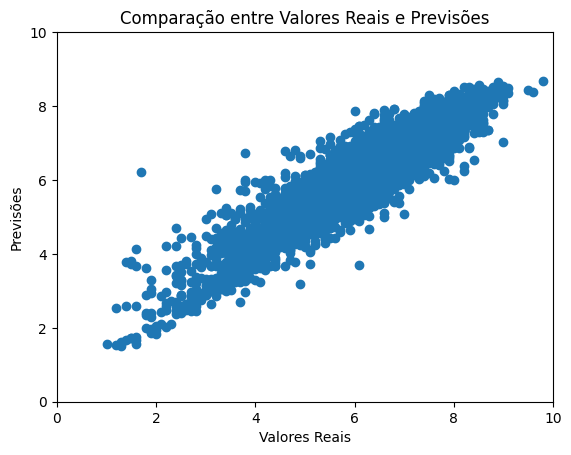

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(principal_df_const, y, test_size=0.2, random_state=42)
model =GradientBoostingRegressor(n_estimators=100, max_depth=3)

# Treinar o modelo
model.fit(Xpca_train, ypca_train)
ypca_pred = model.predict(Xpca_test)

# Criar gráfico de dispersão para comparar previsões com valores reais
plt.scatter(ypca_test, ypca_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

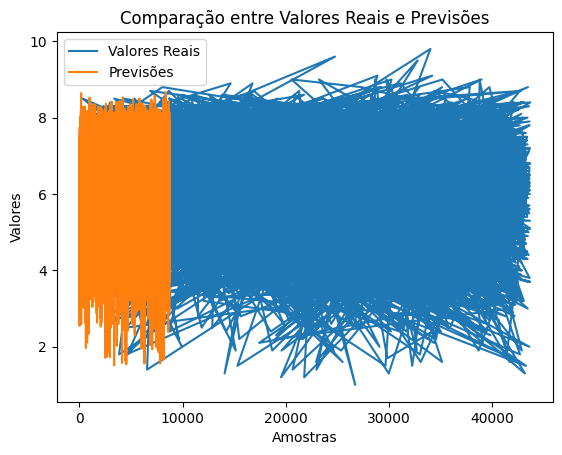

In [65]:
plt.plot(ypca_test, label="Valores Reais")
plt.plot(ypca_pred, label="Previsões")
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.legend()
plt.title("Comparação entre Valores Reais e Previsões")
plt.show()

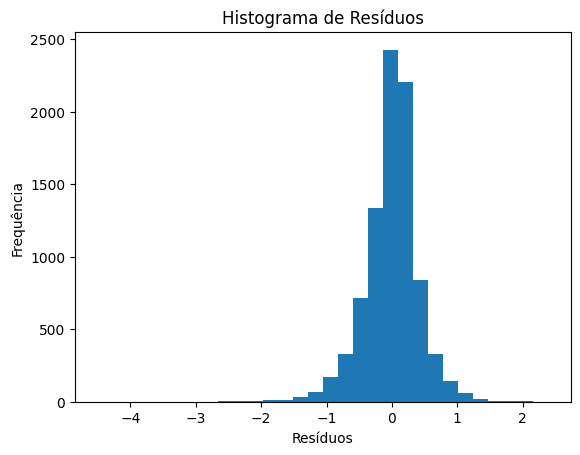

In [66]:
residuals = ypca_test - ypca_pred
plt.hist(residuals, bins=30)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma de Resíduos")
plt.show()

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np



num_folds = 5  # 5-fold cross-validation

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

#validação cruzada
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
#Converter as pontuações para valores positivos
mse_scores = -scores

#resultados
print("Resultados das folds (MSE):", mse_scores)
print("Média dos resultados (MSE):", np.mean(mse_scores))

Resultados das folds (MSE): [0.08182184 0.08513016 0.08904286 0.0878493  0.08456393]
Média dos resultados (MSE): 0.08568161751066042
